In [1]:
# Importing the libraries
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn
seaborn.set() 


/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [70]:
dataset = pd.read_csv("./housing_data/train.csv")
test_dataset = pd.read_csv("./housing_data/test.csv")
submission = pd.read_csv("./housing_data/sample_submission.csv")
#dataset.dtypes[1] == 'O'
#list(dataset)
#dataset.dtypes
frame_all = dataset.append( test_dataset)
#frame_all.SalePrice
#dataset
#frame_all.dtypes
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [37]:
def transform_object_to_dummy(df):
    """
    a function that transforms the object entries to dummies
    """
    dataset_to_complete = df.Id
    for i, types in enumerate(df.dtypes):
        name_for_dummy =  list(df)[i]
        #print name_for_dummy
        if types == 'O':
            dummy  = pd.get_dummies(df[name_for_dummy] , prefix=name_for_dummy, dummy_na=True)
            #print dummy
            #dataset = dataset.drop(name_for_dummy, axis=1)
            dataset_to_complete = pd.concat([dataset_to_complete, dummy], axis=1)
        else: 
            dataset_to_complete = pd.concat([dataset_to_complete, df[name_for_dummy]], axis=1)
    #print dataset_to_complete
    return(dataset_to_complete)

            
dataset_transformed = transform_object_to_dummy(frame_all)
#print dataset_transformed.isnull().sum()
#dataset.Id


In [101]:
def replace_by_mean(df):
    selector = df.isnull().sum()>0
    names = selector[selector==True]
    for name_na in list(selector[selector==True].index):
        if name_na != 'SalePrice':
            df[name_na] = df[name_na].fillna(value = df[name_na].mean())
    return df
dataset_transformed = replace_by_mean(dataset_transformed)
train_set = dataset_transformed[:1460]
test_set = dataset_transformed[1460:]

y = train_set.SalePrice
X = train_set.drop(['SalePrice', 'Id'], axis=1)

test_set = test_set.drop(['SalePrice', 'Id'], axis=1)

In [148]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
reg = ElasticNetCV()
res = reg.fit(y=y, X=X)
reg.score(y=y, X=X)
y_pred = reg.predict(X)
print r2_score(y, y_pred), np.log(mean_squared_error(y, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X=X , y=y , cv = 10)
print("EN :\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())



0.598239596885 21.6529930632
('EN :\n Accuracy:', 0.59668856692605687, '+/-', 0.090566833808568059)


In [132]:
selector = np.abs(res.coef_)>0.
names_lars = X.columns.values[selector]

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression()
reg.fit(y=y, X=X)
reg.score(y=y, X=X)
y_pred = reg.predict(X)
print r2_score(y, y_pred), np.log(mean_squared_error(y, y_pred))
#
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X=X , y=y , cv = 10)
print("Linear Reg:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())


0.933266712864 19.8578410504
('Linear Reg:\n Accuracy:', -573137761674.84436, '+/-', 1244504636429.2297)


In [145]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
reg = RidgeCV()
reg.fit(y=y, X=X)
reg.score(y=y, X=X)
y_pred = reg.predict(X)
print r2_score(y, y_pred), np.log(mean_squared_error(y, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X=X , y=y , cv = 10)
print("Ridge:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())


0.901225710562 20.249974507
('Ridge:\n Accuracy:', 0.84653904512490585, '+/-', 0.10111582046349211)


In [135]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

if False: 
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = reg, X=X , y=y , cv = 10)
    print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())


In [103]:
res = reg.fit(X, y)
y_pred = reg.predict(X)
print r2_score(y, y_pred), np.log(mean_squared_error(y, y_pred))

0.980101249807 18.6477940898


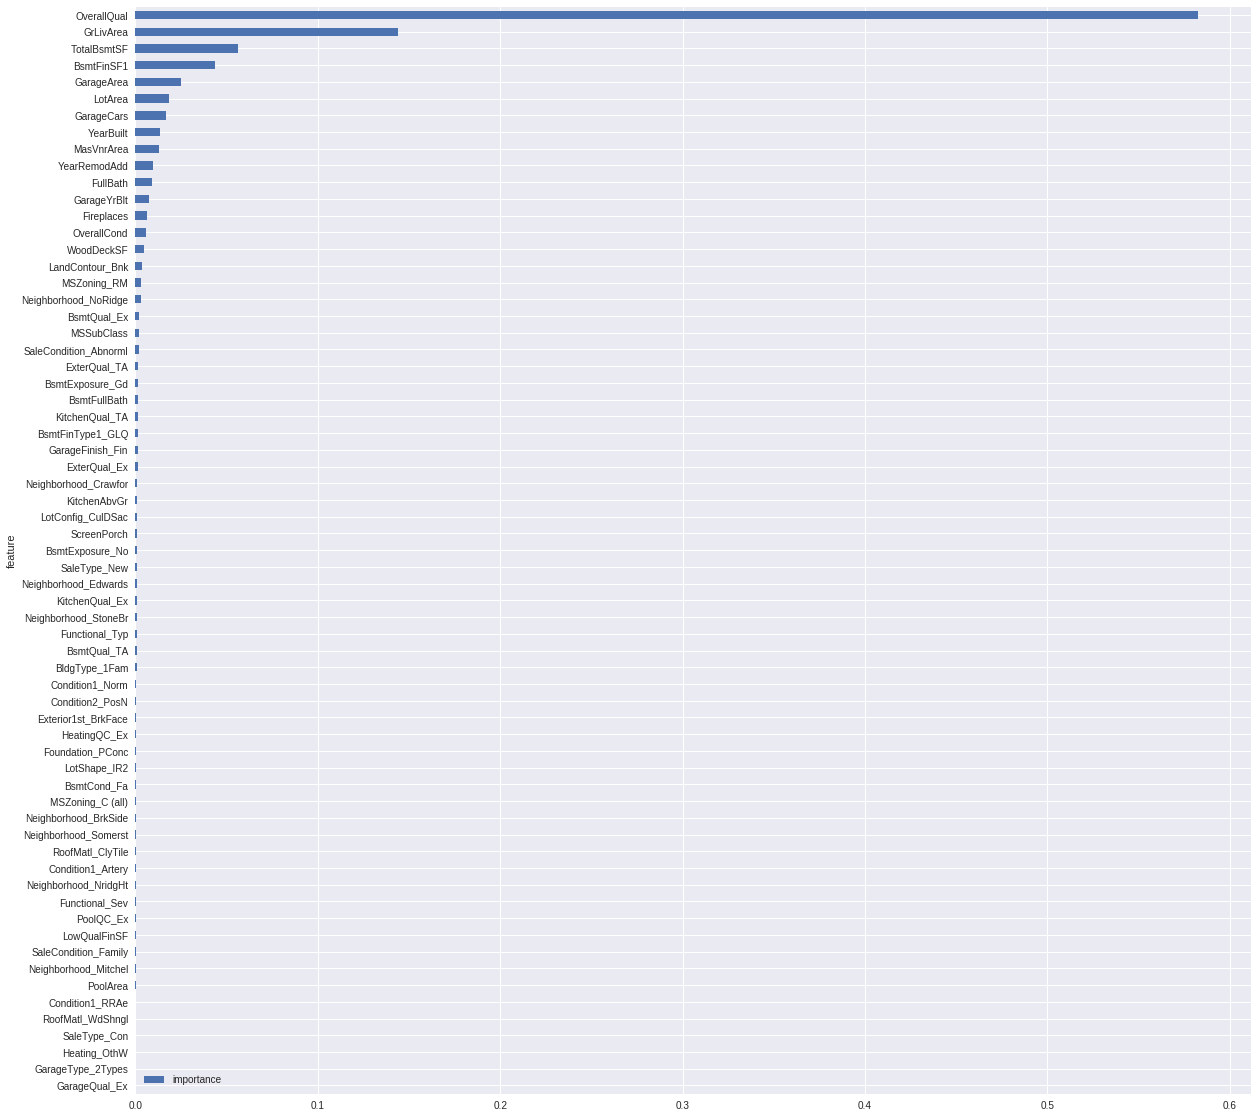

In [150]:
features = pd.DataFrame()
features['feature'] = X_reduced.columns
features['importance'] = res.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [138]:
#names_selected_features = list(features[-20:].index)
names_selected_features = names_lars
X_reduced = X[names_selected_features]
test_reduced = test_set[names_selected_features]
names_lars

array(['BldgType_1Fam', 'BsmtCond_Fa', 'BsmtExposure_Gd',
       'BsmtExposure_No', 'BsmtFinSF1', 'BsmtFinType1_GLQ', 'BsmtFullBath',
       'BsmtQual_Ex', 'BsmtQual_TA', 'Condition1_Artery',
       'Condition1_Norm', 'Condition1_RRAe', 'Condition2_PosN',
       'ExterQual_Ex', 'ExterQual_TA', 'Exterior1st_BrkFace', 'Fireplaces',
       'Foundation_PConc', 'FullBath', 'Functional_Sev', 'Functional_Typ',
       'GarageArea', 'GarageCars', 'GarageFinish_Fin', 'GarageQual_Ex',
       'GarageType_2Types', 'GarageYrBlt', 'GrLivArea', 'Heating_OthW',
       'HeatingQC_Ex', 'KitchenAbvGr', 'KitchenQual_Ex', 'KitchenQual_TA',
       'LandContour_Bnk', 'LotArea', 'LotConfig_CulDSac', 'LotShape_IR2',
       'LowQualFinSF', 'MSSubClass', 'MSZoning_C (all)', 'MSZoning_RM',
       'MasVnrArea', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Mitchel',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_Ston

In [160]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 40, random_state = 0)
y_log = np.log(y)
res = reg.fit(X_reduced, y_log)
y_pred = reg.predict(X_reduced)
print r2_score(y_log, y_pred), np.log(mean_squared_error(y_log, y_pred))
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X=X , y=y_log , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())
y_pred_test

0.981468721032 -10.7985533133
('Random Forest:\n Accuracy:', 0.86839340166074486, '+/-', 0.023688811979726859)


array([ 2.46113011,  2.478677  ,  2.49521781, ...,  2.48608073,
        2.45294268,  2.51771361])

In [165]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [159]:
y_pred_test = reg.predict(test_reduced)
submission.SalePrice = np.exp(y_pred_test)
submission.to_csv('first_submission.csv', index=False)